In [12]:
import sys
# sys.path.append(r'E:/0code')
# sys.path.append(r'/home/wyf/0code')
# sys.path.append(r'/home/wangyf226/0code')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code')
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import gensim
import re
import smart_open
from pyml.feature_extraction.text import CountVectorizer
from pyml.linear_model.classification import LogisticClassifier
from pyml.tree.cart_classification import DecisionTreeClassifier
from pyml.neighbors.classification import KNeighborsClassifier
from pyml.neural_network.classification import MLPClassifier
from pyml.metrics.classification import precision_score
from pyml.model_selection import KFold
from pyml.model_selection import ShuffleSplit
from pyml.preprocessing import StandardScaler
from pyml.logger import logger
import logging
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 读取数据集

In [2]:
train_X_vec2doc_2 = np.load('../data/wyf-train_X-doc2vec-500.npy')
test_X_vec2doc_2 = np.load('../data/wyf-test_X-doc2vec-500.npy')

In [6]:
train_X_vec2doc = np.load('../data/clean/trainX_vec2doc-24000-500.npy')
test_X_vec2doc = np.load('../data/clean/testX_vec2doc-6000-500.npy')

In [7]:
train_X_tfidf = np.load('../data/clean/trainX_tfidf-24000-62761.npy')
test_X_tfidf = np.load('../data/clean/testX_tfidf-6000-62761.npy')

In [10]:
train_X_onehot = np.load('../data/clean/trainX_onehot-24000-62761.npy')
test_X_onehot = np.load('../data/clean/testX_onthot-6000-62761.npy')

In [3]:
train_X = train_X_vec2doc_2
test_X = test_X_vec2doc_2

In [9]:
train_X = train_X_vec2doc
test_X = test_X_vec2doc

In [ ]:
train_X = train_X_tfidf
test_X = test_X_tfidf

In [ ]:
train_X = train_X_onehot
test_X = test_X_onehot

In [4]:
train_Y = np.load('../data/clean/trainY_24000.npy')

In [5]:
train_X.shape,train_Y.shape,test_X.shape

((24000, 500), (24000,), (6000, 500))

# 交叉验证

## 使用没处理的句子生成的doc2vec

In [6]:
train_X = train_X_vec2doc_2
test_X = test_X_vec2doc_2

In [7]:
logger.setLevel(20)

## 遍历节点大小

In [18]:
max_node_sizes = [20,40,80,160,320, 640]
num_iteration = 5000
mini_batch = 2000
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models = []
train_scores = []
valid_scores = []
for train_indices, test_indices in ms.split(train_X):
    for i,max_node_size in enumerate(max_node_sizes):
        clf = DecisionTreeClassifier(divide_way='half', max_node_size=max_node_size)
        flags = ['continuous' for i in range(train_X.shape[1])]
        clf.fit(train_X[train_indices], train_Y[train_indices], flags)
        y_pred = clf.predict(train_X[test_indices])
        y_train_pred = clf.predict(train_X[train_indices])
        train_score = precision_score(train_Y[train_indices], y_train_pred)
        valid_score = precision_score(train_Y[test_indices], y_pred)
        train_scores.append(train_score)
        valid_scores.append(valid_score)
        print('i : {} train_score: {}, valid_score : {}'.format(i, train_score, valid_score))
        models.append(clf)

i : 0 train_score: 0.8665625, valid_score : 0.6183333333333333
i : 1 train_score: 0.80328125, valid_score : 0.63125
i : 2 train_score: 0.7516145833333333, valid_score : 0.6333333333333333
i : 3 train_score: 0.71671875, valid_score : 0.635625
i : 4 train_score: 0.6960416666666667, valid_score : 0.64625
i : 5 train_score: 0.6697395833333334, valid_score : 0.6408333333333334


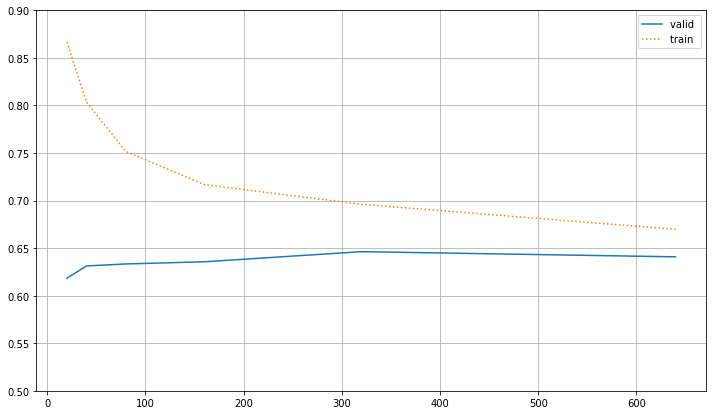

In [20]:
plt.figure(figsize=(12,7)) 
plt.plot(max_node_sizes,valid_scores,'-',label='valid ')
plt.plot(max_node_sizes,train_scores,':',label='train ')
plt.yticks(np.arange(0.5, 0.95, 0.05))
ax = plt.gca()
ax.grid(True)
plt.legend()

In [ ]:
max_node_sizes = [20,40,80,160,320, 640]
num_iteration = 5000
mini_batch = 2000
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models = []
train_scores = []
valid_scores = []
for train_indices, test_indices in ms.split(train_X):
    for i,max_node_size in enumerate(max_node_sizes):
        clf = DecisionTreeClassifier(divide_way='default', max_node_size=max_node_size)
        flags = ['continuous' for i in range(train_X.shape[1])]
        clf.fit(train_X[train_indices], train_Y[train_indices], flags)
        y_pred = clf.predict(train_X[test_indices])
        y_train_pred = clf.predict(train_X[train_indices])
        train_score = precision_score(train_Y[train_indices], y_train_pred)
        valid_score = precision_score(train_Y[test_indices], y_pred)
        train_scores.append(train_score)
        valid_scores.append(valid_score)
        print('i : {} train_score: {}, valid_score : {}'.format(i, train_score, valid_score))
        models.append(clf)

In [ ]:
plt.figure(figsize=(12,7)) 
plt.plot(max_node_sizes,valid_scores,'-',label='valid ')
plt.plot(max_node_sizes,train_scores,':',label='train ')
plt.yticks(np.arange(0.5, 0.95, 0.05))
ax = plt.gca()
ax.grid(True)
plt.legend()

## 使用onehot矩阵

In [11]:
train_X = train_X_onehot
test_X = test_X_onehot

In [33]:
# train_X = train_X.astype('int64')
# test_X = test_X.astype('int64')

In [34]:
# pca = PCA()
# pca.fit(train_X)

In [36]:
# train_X = pca.transform(train_X)
# test_X = pca.transform(test_X)

In [12]:
learning_rate_range = [0.15, 0.2]
num_iteration = 500
mini_batch = 0
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_2 = []
for i,learning_rate in enumerate(learning_rate_range):
    for train_indices, test_indices in ms.split(train_X):
        clf = LogisticClassifier(learning_rate=learning_rate, num_iterations=num_iteration, mini_batch=mini_batch)
        clf.fit_and_valid(train_X[train_indices], train_Y[train_indices], train_X[test_indices], train_Y[test_indices])
        y_pred = clf.predict(train_X[test_indices])
        score = precision_score(train_Y[test_indices], y_pred)
        print('i : {} score: {}'.format(i, score))
        models_2.append(clf)

/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:62: RuntimeWarning: divide by zero encountered in log
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:62: RuntimeWarning: invalid value encountered in log
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:62: RuntimeWarning: invalid value encountered in multiply
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
[    INFO] - [classification] - [176] - [fit_and_valid] 
train 0/500  current cost: nan, train: 0.49614583333333334 ,test: 0.4920833333333333

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 50/500  current cost: nan, train: 0.5267708333333333 ,test: 0.5225

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 100/500  current cost: nan, train: 0.5546354166666667 ,test: 0.551666666

i : 0 score: 0.6754166666666667


[    INFO] - [classification] - [176] - [fit_and_valid] 
train 0/500  current cost: nan, train: 0.47052083333333333 ,test: 0.47458333333333336

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 50/500  current cost: nan, train: 0.51859375 ,test: 0.5260416666666666

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 100/500  current cost: nan, train: 0.5553125 ,test: 0.558125

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 150/500  current cost: nan, train: 0.5861458333333334 ,test: 0.5860416666666667

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 200/500  current cost: nan, train: 0.61328125 ,test: 0.6108333333333333

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 250/500  current cost: nan, train: 0.63375 ,test: 0.630625

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 300/500  current cost: nan, train: 0.6533854166666667 ,test: 0.6472916666666667

[    INFO] - [classification] - [176] - [fit_and_

i : 1 score: 0.6902083333333333


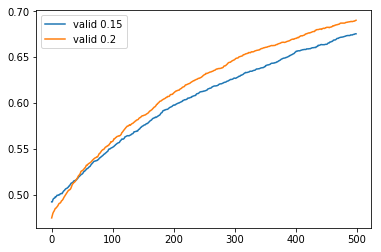

In [15]:
for i,m in enumerate(models_2):
    plt.plot(range(0,len(m.information['test_loss'])),m.information['test_loss'],'-',label='valid '+str(learning_rate_range[i]) )
#     plt.plot(range(0,len(m.information['train_loss'])),m.information['train_loss'],':',label='train '+str(learning_rate_range[i]) )
    plt.legend()

In [16]:
learning_rate_range = [0.15, 0.2]
num_iteration = 2000
mini_batch = 0
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_3 = []
for i,learning_rate in enumerate(learning_rate_range):
    for train_indices, test_indices in ms.split(train_X):
        clf = LogisticClassifier(learning_rate=learning_rate, num_iterations=num_iteration, mini_batch=mini_batch)
        clf.fit_and_valid(train_X[train_indices], train_Y[train_indices], train_X[test_indices], train_Y[test_indices])
        y_pred = clf.predict(train_X[test_indices])
        score = precision_score(train_Y[test_indices], y_pred)
        print('i : {} score: {}'.format(i, score))
        models_3.append(clf)

/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:62: RuntimeWarning: divide by zero encountered in log
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:62: RuntimeWarning: invalid value encountered in log
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/pyml/linear_model/classification.py:62: RuntimeWarning: invalid value encountered in multiply
  cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
[    INFO] - [classification] - [176] - [fit_and_valid] 
train 0/2000  current cost: nan, train: 0.47791666666666666 ,test: 0.46875

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 50/2000  current cost: nan, train: 0.5086458333333334 ,test: 0.49541666666666667

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 100/2000  current cost: nan, train: 0.53984375 ,test: 0.528333333333

i : 0 score: 0.7770833333333333


[    INFO] - [classification] - [176] - [fit_and_valid] 
train 0/2000  current cost: nan, train: 0.5497916666666667 ,test: 0.5575

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 50/2000  current cost: nan, train: 0.5846354166666666 ,test: 0.585625

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 100/2000  current cost: nan, train: 0.6118229166666667 ,test: 0.6129166666666667

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 150/2000  current cost: nan, train: 0.63421875 ,test: 0.6320833333333333

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 200/2000  current cost: nan, train: 0.6509895833333333 ,test: 0.6439583333333333

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 250/2000  current cost: nan, train: 0.6665104166666667 ,test: 0.6545833333333333

[    INFO] - [classification] - [176] - [fit_and_valid] 
train 300/2000  current cost: nan, train: 0.6797916666666667 ,test: 0.6685416666666667

[    INFO] - [clas

KeyboardInterrupt: 